# Auto XRD analyisis

In this notebook we exemplify how to train a AutoXRD CNN model on a chemical space fetching measurements from NOMAD files and running the analysis to match the phases in the patterns. 

In [1]:
# Let's make sure we have all the requirements ready

!pip install git+https://github.com/njszym/XRD-AutoAnalyzer.git

  Cloning https://github.com/njszym/XRD-AutoAnalyzer.git to /tmp/pip-req-build-i_b2t_2q
  Running command git clone --filter=blob:none --quiet https://github.com/njszym/XRD-AutoAnalyzer.git /tmp/pip-req-build-i_b2t_2q
  Resolved https://github.com/njszym/XRD-AutoAnalyzer.git to commit edcba4c2bacb4a46b0efc07cf35f9e9ad8989dff
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 96.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 64.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 78.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 84.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 62.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

## Training the model

The first thing that we need to train the model is a set of structure files for the chemical space that we want to epxlore. Then we will also need to set some parameters for our model, based on the data that we want to evaluate.

In [16]:
import os
from pymatgen.io.cif import CifParser

def remove_problematic_cif_files(directory):
    problematic_files = []

    # Ensure the directory exists
    if not os.path.isdir(directory):
        print(f"The directory '{directory}' does not exist.")
        return

    for filename in os.listdir(directory):
        if filename.lower().endswith((".cif", ".mcif")):  # Case-insensitive check
            filepath = os.path.join(directory, filename)
            try:
                parser = CifParser(filepath)
                structures = parser.get_structures()  # Attempt to parse the CIF file
            except Exception as e:
                print(f"Problem with file: {filename}, Error: {e}")
                problematic_files.append(filepath)

    if problematic_files:
        for file_path in problematic_files:
            try:
                os.remove(file_path)
                print(f"Removed problematic file: {os.path.basename(file_path)}")
            except Exception as e:
                print(f"Failed to remove {os.path.basename(file_path)}. Error: {e}")
        print("\nAll problematic files have been removed.")
    else:
        print("All files parsed successfully! No files were removed.")

# Directory containing CIF files
cif_directory = 'All_CIFs'

# Call the function to remove problematic files
remove_problematic_cif_files(cif_directory)


/tmp/ipykernel_1224/1222366715.py:17: FutureWarning: get_structures is deprecated
get_structures is deprecated and will be removed in 2024. Use parse_structures instead.The only difference is that primitive defaults to False in the new parse_structures method.So parse_structures(primitive=True) is equivalent to the old behavior of get_structures().
  structures = parser.get_structures()  # Attempt to parse the CIF file
/home/pepe_marquez/NOMAD/nomad/.pyenv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/home/pepe_marquez/NOMAD/nomad/.pyenv/lib/python3.11/site-packages/pymatgen/io/cif.py:1138: UserWarning: Incorrect stoichiometry:
  CIF={'Cu': 7.0, 'P': 1.0, 'S': 6.0}
  PMG={'Cu': 27.972000000000012, 'P': 4.0, 'S': 23.855999999999995}
  ratios={'P': 4.0, 'Cu':

All files parsed successfully! No files were removed.


/home/pepe_marquez/NOMAD/nomad/.pyenv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: 1 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [1]:
import shutil
import sys

import numpy as np
from autoXRD import cnn, solid_solns, spectrum_generation, tabulate_cifs  # type: ignore


ModuleNotFoundError: No module named 'autoXRD'

In [ ]:

# Define default values for the parameters
max_texture = 0.5
min_domain_size = 0.3
max_domain_size = 30.0
max_strain = 0.03
num_spectra = 100
min_angle = 20.00
max_angle = 80.00
max_shift = 0.5
separate = True
impur_amt = 70
skip_filter = True
include_elems = True
inc_pdf = True
num_epochs = 50
test_fraction = 0.2


In [ ]:

def run_xrd_model(max_texture=max_texture,
                  min_domain_size=min_domain_size,
                  max_domain_size=max_domain_size,
                  max_strain=max_strain,
                  num_spectra=num_spectra,
                  min_angle=min_angle,
                  max_angle=max_angle,
                  max_shift=max_shift,
                  separate=separate,
                  impur_amt=impur_amt,
                  skip_filter=skip_filter,
                  include_elems=include_elems,
                  inc_pdf=inc_pdf,
                  num_epochs=num_epochs,
                  test_fraction=test_fraction):

    if not skip_filter:
        assert 'All_CIFs' in os.listdir('.'), 'No All_CIFs directory was provided. Please create or use --skip_filter'
        assert 'References' not in os.listdir('.'), 'References directory already exists. Please remove or use --skip_filter'

        # Clean up the Filtered_CIFs directory if it exists
        filtered_cif_directory = 'Filtered_CIFs'
        if os.path.exists(filtered_cif_directory):
            shutil.rmtree(filtered_cif_directory)

        tabulate_cifs.main('All_CIFs', 'References', include_elems)
    else:
        assert 'References' in os.listdir('.'), '--skip_filter was specified, but no References directory was provided'

    # Manually remove '.ipynb_checkpoints' from 'Filtered_CIFs' before running the rest
    filtered_cif_directory = 'Filtered_CIFs'
    if os.path.exists(filtered_cif_directory):
        for item in os.listdir(filtered_cif_directory):
            item_path = os.path.join(filtered_cif_directory, item)
            if os.path.isdir(item_path):
                shutil.rmtree(item_path)  # Remove any directories like .ipynb_checkpoints

        # Optionally, generate hypothetical solid solutions
    solid_solns.main('References')

    # Remove the Models directory if it exists
    models_directory = 'Models'
    if os.path.exists(models_directory):
        shutil.rmtree(models_directory)


    # Simulate and save augmented XRD spectra
    xrd_obj = spectrum_generation.SpectraGenerator('References', num_spectra, max_texture, min_domain_size, max_domain_size, max_strain, min_angle, max_angle, separate)
    xrd_specs = xrd_obj.augmented_spectra
    np.save('XRD', xrd_specs)

    # Train, test, and save the CNN
    cnn.main(xrd_specs, num_epochs=50, testing_fraction=0.2, is_pdf=False,)

        # If specified, train another model on PDFs
    if inc_pdf:
        pdf_obj = spectrum_generation.SpectraGenerator('References', num_spectra, max_texture, min_domain_size,
            max_domain_size, max_strain, max_shift, impur_amt, min_angle, max_angle, separate, is_pdf=True)
        pdf_specs = pdf_obj.augmented_spectra

        # Save PDFs if flag is specified
        if '--save' in sys.argv:
            np.save('PDF', np.array(pdf_specs))

        # Move trained XRD model to new directory
        os.mkdir('Models')
        os.rename('Model.h5', 'Models/XRD_Model.h5')

        # Train, test, and save the CNN
        test_fraction = 0.2
        cnn.main(pdf_specs, num_epochs, test_fraction, is_pdf=True)
        os.rename('Model.h5', 'Models/PDF_Model.h5')


In [12]:
import os

def get_cif_files_from_folder(folder_name):
    '''Returns a list of CIF files with their full paths in the specified folder'''
    cif_files_names = []
    for file in os.listdir(folder_name):
        if file.endswith('.cif'):
            full_path = os.path.join(folder_name, file)
            cif_files_names.append(full_path)
    return cif_files_names

# now one function to get thhe file objects
def get_cif_files_from_folder(folder_name):
    '''	Returns a list of CIF files names in the specified folder '''
    cif_files = []
    for file in os.listdir(folder_name):
        if file.endswith('.cif'):
            cif_files.append(file)
    return cif_files

In [13]:
import os

def get_cif_files_from_folder(folder_name):
    '''Returns a list of CIF files with their full paths in the specified folder'''
    cif_files_names = []
    for file in os.listdir(folder_name):
        if file.endswith('.cif'):
            full_path = os.path.join(folder_name, file)
            cif_files_names.append(full_path)
    return cif_files_names

## Save the Model Entry in NOMAD

Now that we have finished creating the model, Let's create a NOMAD entry to be able to find it and reuse it easily. 

In [17]:
from nomad_auto_xrd.schema_packages.auto_xrd import AutoXRDModel
from nomad.datamodel.datamodel import EntryArchive
# from nomad_material_processing.utils import create_archive
import logging
logger = logging.getLogger(__name__)

def create_auto_xrd_model(cif_folder, xrd_model_path, pdf_model_path, output_file):
    archive = EntryArchive(
        data = AutoXRDModel(
            cif_files=get_cif_files_from_folder(cif_folder),
            xrd_model_file=xrd_model_path,
            pdf_model_file=pdf_model_path,
            max_texture=max_texture,
            min_domain_size=min_domain_size,
            max_domain_size=max_domain_size,
            max_strain=max_strain,
            num_patterns=num_spectra,
            min_angle=min_angle,
            max_angle=max_angle,
            max_shift=max_shift,
            separate=separate,
            impur_amt=impur_amt,
            skip_filter=skip_filter,
            include_elems=include_elems,
            inc_pdf=inc_pdf,
            num_epochs=num_epochs,
            test_fraction=test_fraction
        )
    )

    with open(output_file, 'w') as f:
        f.write(archive.m_to_json(indent=4))

In [18]:
create_auto_xrd_model('All_CIFs', 'Models/XRD_Model.h5', 'Models/PDF_Model.h5', 'auto_xrd_model.archive.json')

In [11]:

run_xrd_model()


/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (S

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - categorical_accuracy: 0.5383 - loss: 2.0828 - val_categorical_accuracy: 0.4854 - val_loss: 11.9627
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - categorical_accuracy: 0.7705 - loss: 0.9952 - val_categorical_accuracy: 0.6500 - val_loss: 3.4942
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - categorical_accuracy: 0.8367 - loss: 0.6783 - val_categorical_accuracy: 0.7917 - val_loss: 1.4896
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - categorical_accuracy: 0.8432 - loss: 0.6083 - val_categorical_accuracy: 0.6812 - val_loss: 3.0404
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - categorical_accuracy: 0.8480 - loss: 0.5144 - val_categorical_accuracy: 0.6792 - val_loss: 3.7634
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - categorical_accuracy: 0.8654 - loss: 0.4614 - val_categorical_accuracy: 0.8687 - val_loss: 0.5662
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - categorical_accuracy: 0.8945 - 

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - categorical_accuracy: 0.9717 - loss: 0.1309
Test Accuracy: 97.66666889190674%


## Let's try to run some inference

In [16]:
import json
from autoXRD import spectrum_analysis, visualizer, quantifier
import matplotlib.pyplot as plt
import numpy as np
import os
from ipywidgets import interact, IntSlider, FloatSlider, Checkbox, Text, Button, VBox, HBox, Output
from IPython.display import display
import time


def convert_to_serializable(obj):
    """Convert non-serializable objects like numpy arrays to serializable formats."""
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {key: convert_to_serializable(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_to_serializable(item) for item in obj]
    return obj

def run_analysis(references_folder='References',
                 spectra_folder='Spectra',
                 max_phases=3,
                 cutoff_intensity=1,
                 min_conf=40,
                 wavelength='CuKa',
                 unknown_threshold=25.0,
                 show_reduced=False,
                 inc_pdf=False,
                 parallel=False,
                 raw=True,
                 show_indiv=False,
                 min_angle=25.00,
                 max_angle=80.00):

    start = time.time()

    # Check for spectra
    if not os.path.exists(spectra_folder) or len(os.listdir(spectra_folder)) == 0:
        print(f'Please provide at least one pattern in the {spectra_folder} directory.')
        return

    results = {'XRD': {}, 'PDF': {}}

    # XRD/PDF ensemble requires all predictions
    if inc_pdf:
        final_conf = min_conf
        min_conf = 10.0

    model_path = 'Models/XRD_Model.h5' if inc_pdf else 'Model.h5'

    # Ensure temp directory exists
    if not os.path.exists('temp'):
        os.mkdir('temp')

    # Get predictions from XRD analysis
    results['XRD']['filenames'], results['XRD']['phases'], results['XRD']['confs'], results['XRD']['backup_phases'], \
    results['XRD']['scale_factors'], results['XRD']['reduced_spectra'] = spectrum_analysis.main(
        spectra_folder, references_folder, max_phases, cutoff_intensity, min_conf, wavelength, min_angle, max_angle, parallel, model_path, is_pdf=False)

    if inc_pdf:
        # Get predictions from PDF analysis
        model_path = 'Models/PDF_Model.h5'
        results['PDF']['filenames'], results['PDF']['phases'], results['PDF']['confs'], results['PDF']['backup_phases'], \
        results['PDF']['scale_factors'], results['PDF']['reduced_spectra'] = spectrum_analysis.main(
            spectra_folder, references_folder, max_phases, cutoff_intensity, min_conf, wavelength, min_angle, max_angle, parallel, model_path, is_pdf=True)

        # Merge results
        results['Merged'] = spectrum_analysis.merge_results(results, final_conf, max_phases)
    else:
        results['Merged'] = results['XRD']

    # Process results
    for idx, (spectrum_fname, phase_set, confidence, backup_set, heights, final_spectrum) in \
            enumerate(zip(results['Merged']['filenames'], results['Merged']['phases'], results['Merged']['confs'],
                          results['Merged']['backup_phases'], results['Merged']['scale_factors'], results['Merged']['reduced_spectra'])):

        # Display phase ID info
        print(f"Filename: {spectrum_fname}")
        print(f"Predicted phases: {phase_set}")
        print(f"Confidence: {confidence}")

        # Check for unknown peaks
        if len(phase_set) > 0 and 'None' not in phase_set:
            remaining_I = max(final_spectrum)
            if remaining_I > unknown_threshold:
                print(f"WARNING: some peaks (I ~ {int(remaining_I)}%) were not identified.")
        else:
            print("WARNING: no phases were identified")
            continue

        # Show backup predictions
        if show_indiv:
            print(f"XRD predicted phases: {results['XRD']['phases'][idx]}")
            print(f"XRD confidence: {results['XRD']['confs'][idx]}")
            if inc_pdf:
                print(f"PDF predicted phases: {results['PDF']['phases'][idx]}")
                print(f"PDF confidence: {results['PDF']['confs'][idx]}")

        # Plot the results
        phasenames = [f'{phase}.cif' for phase in phase_set]
        visualizer.main(spectra_folder, spectrum_fname, phasenames, heights, final_spectrum,
                        min_angle, max_angle, wavelength, save=False, show_reduced=show_reduced,
                        inc_pdf=inc_pdf, plot_both=False, raw=raw)

    end = time.time()
    print(f"Total time: {round(end - start, 1)} sec")

    # Convert results to a JSON serializable format
    serializable_results = convert_to_serializable(results)

    # Save the results dictionary as a JSON file
    results_file = 'results.json'
    with open(results_file, 'w') as f:
        json.dump(serializable_results, f, indent=4)
    print(f"Results saved to {results_file}")

/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['wyckoffs']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (Spg

Filename: mittma_0015_FR_0-Copy1.0_1point.xy
Predicted phases: ['CuPS3_136']
Confidence: [76.0]


/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['wyckoffs']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (Spg

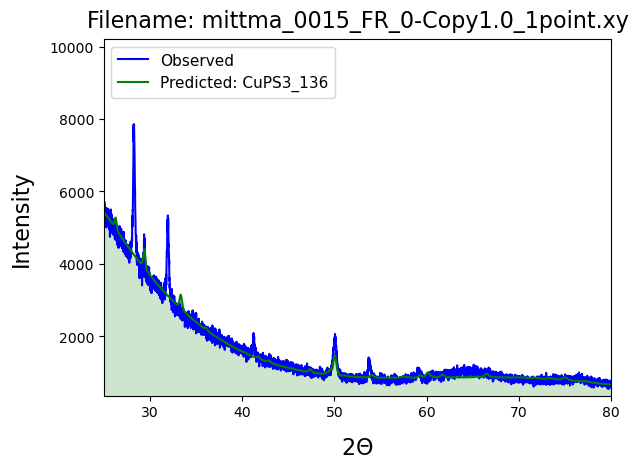

Filename: mittma_0019_R_slowscans.xy
Predicted phases: ['CuPS3_136']
Confidence: [55.0]


/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['wyckoffs']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (Spg

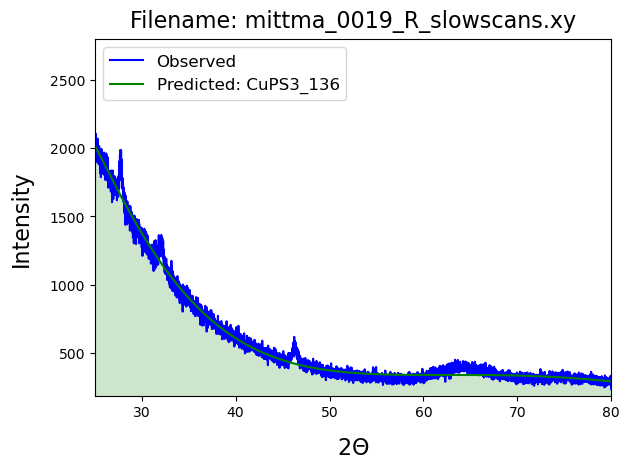

Total time: 22.7 sec
Results saved to results.json


In [17]:
run_analysis()

## Analysis with PDF

In [24]:
import json
from autoXRD import spectrum_analysis, visualizer, quantifier
import matplotlib.pyplot as plt
import numpy as np
import os
from ipywidgets import interact, IntSlider, FloatSlider, Checkbox, Text, Button, VBox, HBox, Output
from IPython.display import display
import time


def convert_to_serializable(obj):
    """Convert non-serializable objects like numpy arrays to serializable formats."""
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {key: convert_to_serializable(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_to_serializable(item) for item in obj]
    return obj

def run_analysis(references_folder='References',
                 spectra_folder='Spectra',
                 max_phases=3,
                 cutoff_intensity=1,
                 min_conf=40,
                 wavelength='CuKa',
                 unknown_threshold=25.0,
                 show_reduced=False,
                 inc_pdf=True,
                 parallel=False,
                 raw=True,
                 show_indiv=False,
                 min_angle=25.00,
                 max_angle=80.00):

    start = time.time()

    # Check for spectra
    if not os.path.exists(spectra_folder) or len(os.listdir(spectra_folder)) == 0:
        print(f'Please provide at least one pattern in the {spectra_folder} directory.')
        return

    results = {'XRD': {}, 'PDF': {}}

    # XRD/PDF ensemble requires all predictions
    if inc_pdf:
        final_conf = min_conf
        min_conf = 10.0

    model_path = 'Models/XRD_Model.h5' if inc_pdf else 'Model.h5'

    # Ensure temp directory exists
    if not os.path.exists('temp'):
        os.mkdir('temp')

    # Get predictions from XRD analysis
    results['XRD']['filenames'], results['XRD']['phases'], results['XRD']['confs'], results['XRD']['backup_phases'], \
    results['XRD']['scale_factors'], results['XRD']['reduced_spectra'] = spectrum_analysis.main(
        spectra_folder, references_folder, max_phases, cutoff_intensity, min_conf, wavelength, min_angle, max_angle, parallel, model_path, is_pdf=False)

    if inc_pdf:
        # Get predictions from PDF analysis
        model_path = 'Models/PDF_Model.h5'
        results['PDF']['filenames'], results['PDF']['phases'], results['PDF']['confs'], results['PDF']['backup_phases'], \
        results['PDF']['scale_factors'], results['PDF']['reduced_spectra'] = spectrum_analysis.main(
            spectra_folder, references_folder, max_phases, cutoff_intensity, min_conf, wavelength, min_angle, max_angle, parallel, model_path, is_pdf=True)

        # Merge results
        results['Merged'] = spectrum_analysis.merge_results(results, final_conf, max_phases)
    else:
        results['Merged'] = results['XRD']

    # Process results
    for idx, (spectrum_fname, phase_set, confidence, backup_set, heights, final_spectrum) in \
            enumerate(zip(results['Merged']['filenames'], results['Merged']['phases'], results['Merged']['confs'],
                          results['Merged']['backup_phases'], results['Merged']['scale_factors'], results['Merged']['reduced_spectra'])):

        # Display phase ID info
        print(f"Filename: {spectrum_fname}")
        print(f"Predicted phases: {phase_set}")
        print(f"Confidence: {confidence}")

        # Check for unknown peaks
        if len(phase_set) > 0 and 'None' not in phase_set:
            remaining_I = max(final_spectrum)
            if remaining_I > unknown_threshold:
                print(f"WARNING: some peaks (I ~ {int(remaining_I)}%) were not identified.")
        else:
            print("WARNING: no phases were identified")
            continue

        # Show backup predictions
        if show_indiv:
            print(f"XRD predicted phases: {results['XRD']['phases'][idx]}")
            print(f"XRD confidence: {results['XRD']['confs'][idx]}")
            if inc_pdf:
                print(f"PDF predicted phases: {results['PDF']['phases'][idx]}")
                print(f"PDF confidence: {results['PDF']['confs'][idx]}")

        # Plot the results
        phasenames = [f'{phase}.cif' for phase in phase_set]
        visualizer.main(spectra_folder, spectrum_fname, phasenames, heights, final_spectrum,
                        min_angle, max_angle, wavelength, save=False, show_reduced=show_reduced,
                        inc_pdf=inc_pdf, plot_both=False, raw=raw)

    end = time.time()
    print(f"Total time: {round(end - start, 1)} sec")

    # Convert results to a JSON serializable format
    serializable_results = convert_to_serializable(results)

    # Save the results dictionary as a JSON file
    results_file = 'results.json'
    with open(results_file, 'w') as f:
        json.dump(serializable_results, f, indent=4)
    print(f"Results saved to {results_file}")

/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['wyckoffs']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (Spg

Filename: Background_Subtracted_Data_with_Padding.xy
Predicted phases: ['Cu3PS4_31']
Confidence: [49.0]


/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['wyckoffs']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (Spg

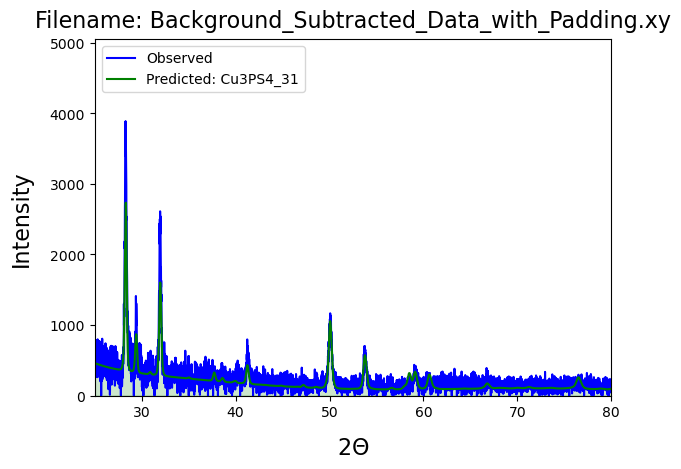

Filename: mittma_0015_FR_0-Copy1.0_1point.xy
Predicted phases: ['Cu3PS4_31', 'CuPS3_136']
Confidence: [50.0, 49.5]


/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['wyckoffs']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (Spg

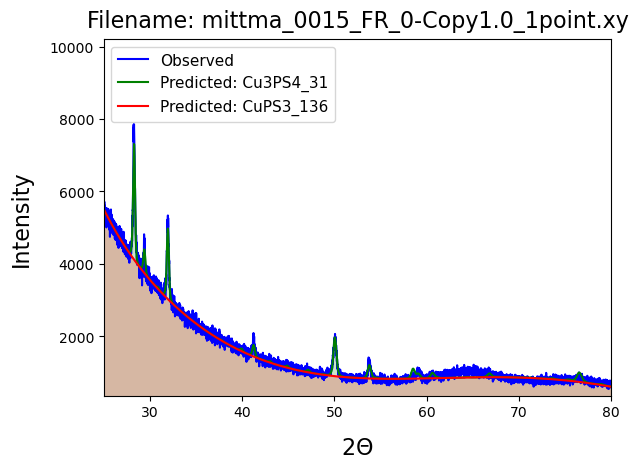

Filename: mittma_0019_R_slowscans.xy
Predicted phases: ['CuPS3_136']
Confidence: [59.0]


/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['wyckoffs']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (Spg

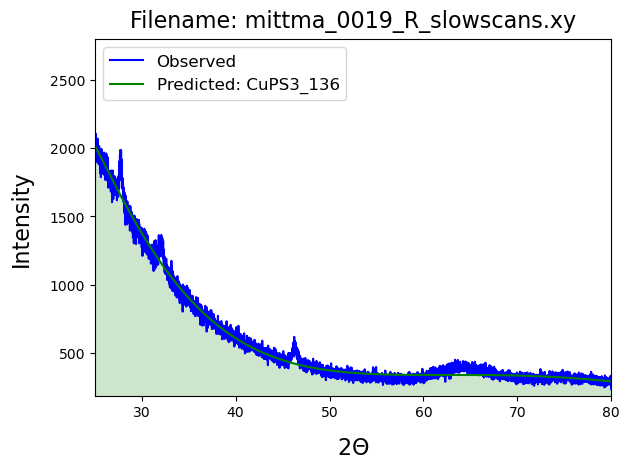

Total time: 142.3 sec


TypeError: Object of type ndarray is not JSON serializable

In [26]:
run_analysis()